# Seoul Bike Dataset

## Some Information on this Dataset

According to the responsible of this dataset, the dataset contains count of public bikes rented at each hour in Seoul Bike haring System with the corresponding Weather data and Holidays information

"Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information."

I will check that the information is correct. And then, I will get other information in applying analysis on the different features such as:
- Type of problem (regression or classification),
- Which feature is the target,
- Type of the different features + some statistics,
- Checking the quality of the dataset.

## Requirements

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# Sklearn: Metrics
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, cross_validate, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error

# Sklearn: Models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()  # to have the grid set

## Data Collection

In [3]:
df_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv', sep=',', encoding = "ISO-8859-1")
df_data

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

## First Exploratory Data Analysis (EDA)

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We can see here that there are 15 features, either numerical or categorical ones:
   - Date: String (dd/mm/yyyy)
   - Rented Bike Count: Integer
   - Hour: Integer
   - Temperature(°C): Float (Degree Celsius)
   - Humidity(%): Integer (%)
   - Wind speed (m/s): Float (m/s)
   - Visibility (10m): Integer
   - Dew point temperature(°C): Float (Degree Celsius)
   - Solar Radiation (MJ/m2): Float (MJ/m^2)
   - Rainfall(mm): Float (mm)
   - Snowfall (cm): Float (cm)
   - Seasons: String (Winter, Spring, Summer and Autumn)
   - Holiday: Integer (Holiday/No Holiday)
   - Functioning Day: Integer (Yes/No)


We have date/time and weather information, and another feature describing the number of bikes rented depending on the other features. This feature is most likely to be the target of this dataset, so we have here a supervised problem. 


So what is the problem?
With the information gathered above, we can predict how many bikes can be rented depending on the date/hour and the weather. This will allow us to predict the supply of bikes and satisfy the demand. We want here the prediction of a quantity so we can conclude this is a regression problem.

In [5]:
df_data.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [6]:
df_data.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

## Data Preprocessing

### Missing Values

First, let's check if there are missing values in this dataset. If so, I will have to either drop the feature if it has too many missing values or if not, I will have to apply some technique of data augmentation.

In [7]:
df_data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no missing values in this dataset, which is a good thing.

### Zero Values

In [8]:
values_tot = len(df_data.index)
df_data[df_data == 0].count()/values_tot

Date                         0.000000
Rented Bike Count            0.033676
Hour                         0.041667
Temperature(°C)              0.002397
Humidity(%)                  0.001941
Wind speed (m/s)             0.008447
Visibility (10m)             0.000000
Dew point temperature(°C)    0.006849
Solar Radiation (MJ/m2)      0.490868
Rainfall(mm)                 0.939726
Snowfall (cm)                0.949429
Seasons                      0.000000
Holiday                      0.000000
Functioning Day              0.000000
dtype: float64

I wanted to see the proportion of null values for each feature. We have three features that have a high proportion of them but that can be explained by the nature of the features. Here, nothing is alarming.

### Outliers

Outliers are observations that can be interpreted as data that deviates quite noticeably from other observations in a sample.

Sometimes, those outliers are shown as bad data in the dataset: we can either drop them or arrange them. But in some other cases, it may not be possible to determine if an outlying point is bad data, because it can be due to random variation or indicate something scientifically interesting.

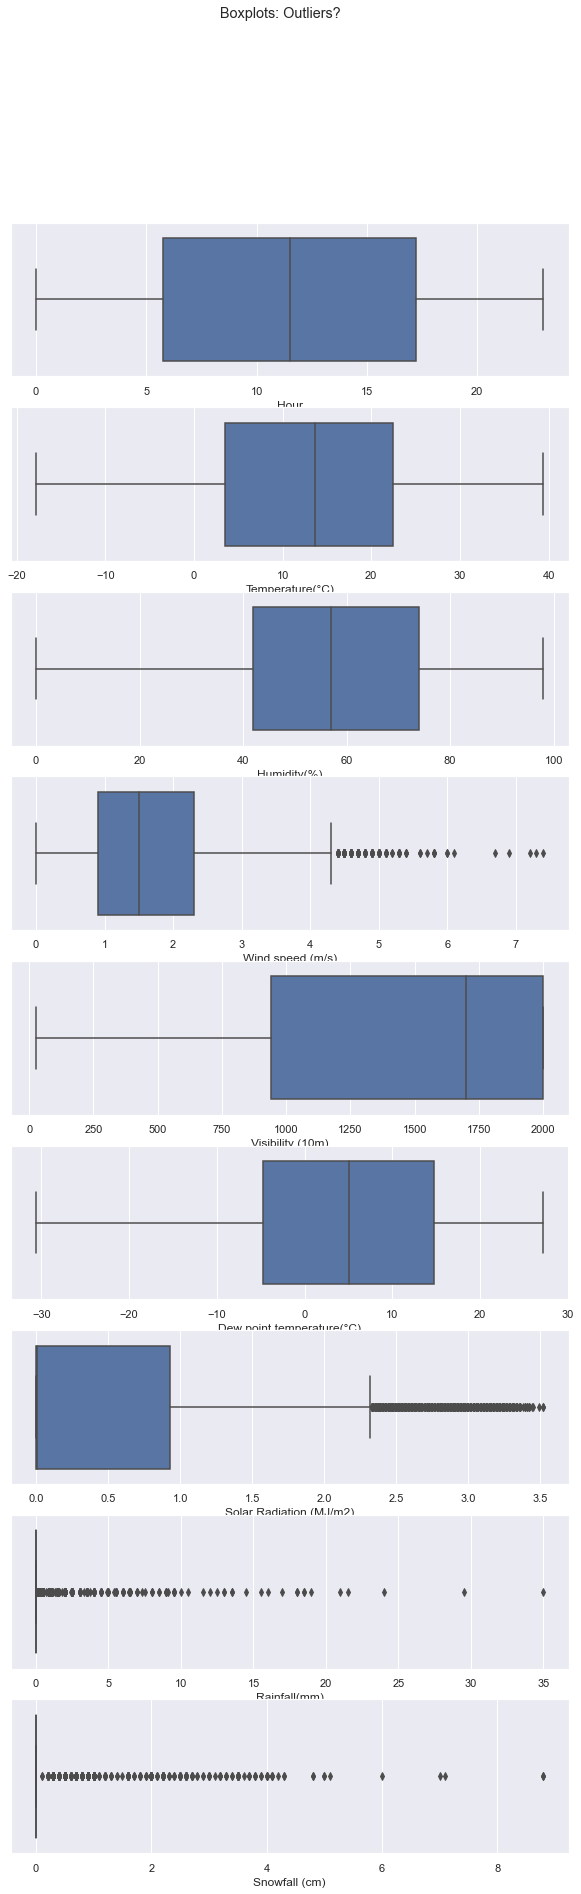

In [9]:
fig, ax = plt.subplots(9, 1, figsize=(10, 30))
fig.suptitle('Boxplots: Outliers?')

sns.boxplot(data=df_data, x=df_data['Hour'], ax=ax[0])
sns.boxplot(data=df_data, x=df_data['Temperature(°C)'], ax=ax[1])
sns.boxplot(data=df_data, x=df_data['Humidity(%)'], ax=ax[2])
sns.boxplot(data=df_data, x=df_data['Wind speed (m/s)'], ax=ax[3])
sns.boxplot(data=df_data, x=df_data['Visibility (10m)'], ax=ax[4])
sns.boxplot(data=df_data, x=df_data['Dew point temperature(°C)'], ax=ax[5])
sns.boxplot(data=df_data, x=df_data['Solar Radiation (MJ/m2)'], ax=ax[6])
sns.boxplot(data=df_data, x=df_data['Rainfall(mm)'], ax=ax[7])
sns.boxplot(data=df_data, x=df_data['Snowfall (cm)'], ax=ax[8])

plt.show()

Here, we have some outliers for four features (Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), and Snowfall (cm)). Here we have weather features so those outliers are more likely unpredictable and random variations than bad data. So, I will keep them and don't treat outliers in this dataset.

### Categorical Features

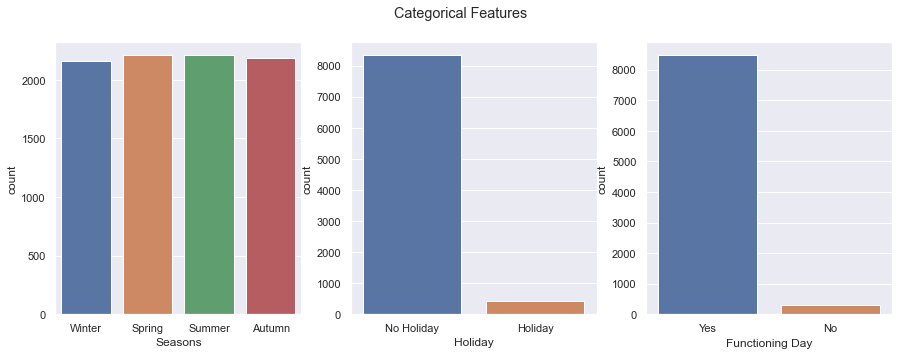

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Categorical Features')

sns.countplot(x='Seasons', data=df_data, ax=ax[0])
sns.countplot(x='Holiday', data=df_data, ax=ax[1])
sns.countplot(x='Functioning Day', data=df_data, ax=ax[2])

plt.show()

The Seasons feature has equidistributed data between the four seasons, so there will be no risk of bias in the models that will be implemented. For the Holiday and Functioning Day features, we do not have balanced data between the two categories. But their information is important so we have to keep them.

## Second Exploratory Data Analysis (EDA)

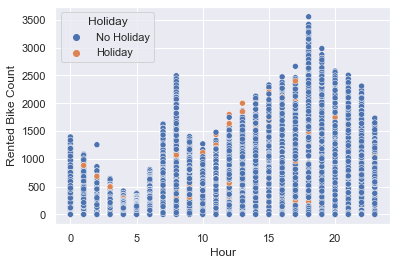

In [29]:
sns.scatterplot(x='Hour', y='Rented Bike Count', data=df_data, hue='Holiday')
plt.show()

### Univariate Analysis

So first, I will make a copy of the previous dataframe to get one for the visualization. Then, I will create new columns to represent the data in another way.

In [11]:
df_viz = df_data.copy()

In [12]:
df_viz['Year'] = df_viz['Date'].apply(lambda x: int(x.split('/')[-1]))
df_viz['Month'] = df_viz['Date'].apply(lambda x: int(x.split('/')[1]))
df_viz['Day'] = df_viz['Date'].apply(lambda x: int(x.split('/')[0]))

df_viz['Business Day'] = df_viz['Date'].apply(lambda x: len(pd.bdate_range(pd.to_datetime(x), pd.to_datetime(x))))

l_morning = [7, 8, 9, 10, 11, 12]
l_afternoon = [13, 14, 15, 16, 17, 18]
l_evening = [19, 20, 21, 22, 23, 0]
l_night = [1, 2, 3, 4, 5, 6]

df_viz['Time of the day'] = pd.Series(['Morning' if h in l_morning else 'Afternoon' if h in l_afternoon else 'Evening' if h in l_evening else 'Night' if h in l_night else np.nan for h in df_viz['Hour'].tolist()])

df_viz

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  Year  Month  Day  Business Day  \
0     No Holiday             Yes  2017     12    1             1   
1     No Holiday             Yes  2017     12    1             1   
2     No Holiday             Yes  2017     12    1             1   
3     No Holiday             Yes  2017     12    1             1   
4     No Holiday             Yes  2017     12    1             1   
...          ...             ...   ...    ...  ...           ...   
8755  No Holiday             Yes  2018     11   30             1   
8756  No Holiday             Yes  2018     11   30             1   
8757  No Holiday             Yes  2018     11   30             1   
8758  No Holiday             Yes  2018     11   30             1   
8759  No Holiday             Yes  2018     11   30             1   

     Time of the day  
0            Evening  
1              Night  
2              Night  
3              Night  
4              Night  
...              ...  
8755         Evening  
8756         Evening  
8757         Evening  
8758         Evening  
8759         Evening  

[8760 rows x 19 columns]

In [13]:
len(df_viz['Date'].unique()), len(df_viz['Year'].unique()), len(df_viz['Month'].unique()), len(df_viz['Hour'].unique())

(365, 2, 12, 24)

We have the number of rented bikes for 365 days depending on the hour of a day, two years more or less represented (2017: 1 month, 2018: 11 months).

#### Time

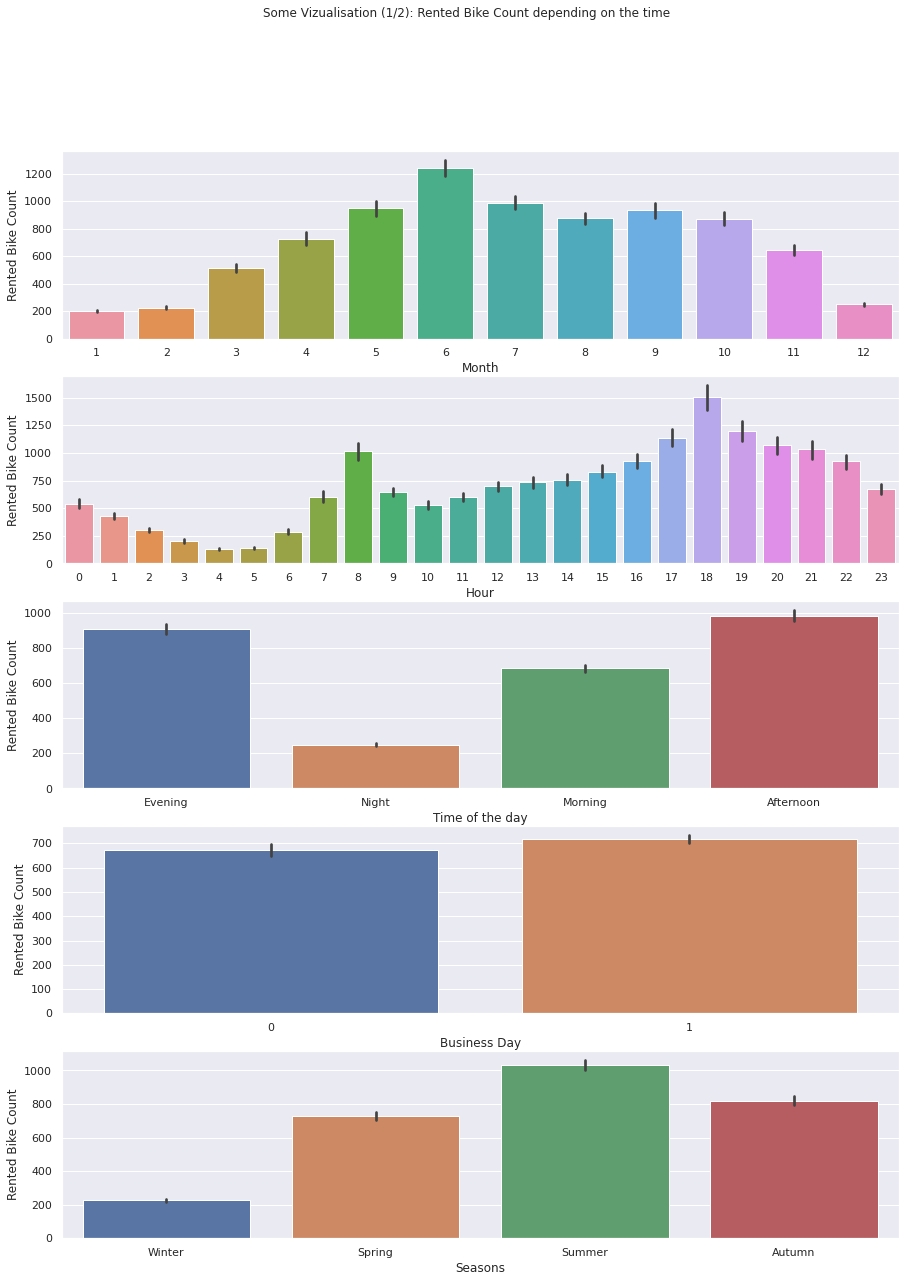

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(15, 20))
fig.suptitle('Some Vizualisation (1/2): Rented Bike Count depending on the time')

sns.barplot(x=df_viz['Month'], y=df_viz['Rented Bike Count'], data=df_viz, ax=ax[0])
sns.barplot(x=df_viz['Hour'], y=df_viz['Rented Bike Count'], data=df_viz, ax=ax[1])
sns.barplot(x=df_viz['Time of the day'], y=df_viz['Rented Bike Count'], data=df_viz, ax=ax[2])
sns.barplot(x=df_viz['Business Day'], y=df_viz['Rented Bike Count'], data=df_viz, ax=ax[3])
sns.barplot(x=df_viz['Seasons'], y=df_viz['Rented Bike Count'], data=df_viz, ax=ax[4])

plt.show()

Plot 1 shows the number of rented bikes depending on the month of the year. We can see that June is the month when the number of rented bikes was the highest. The number of rented bikes increased from January to June (pic) and then, decreased until December.

We can now observe more accurately, the number of rented bikes depending on the hour of the day. The second plot shows several pics, one in the morning (8:00 AM) where people go to work and another one in the afternoon (6:00 PM) when people come back home. In between, people rents bikes the same amount of bike as in the evening between 7:00 PM and 0:00 AM (plots 2 and 3).

Plot 4 shows the number of rented bikes on business days and weekends. There is no big difference between them. There is almost the same amount of rent.

The last plot shows the number of rented bikes depending on the seasons. People rent more bikes during summer than in the other season because of the weather which is hot and less rainy.

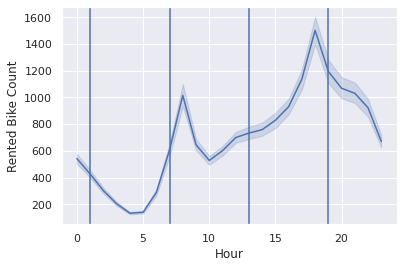

In [ ]:
# Another representation of the number of rented bikes depending on the hour + seperation of the different moments of the day
sns.lineplot(x=df_viz['Hour'], y=df_viz['Rented Bike Count'], data=df_viz)
plt.axvline(7, 0)
plt.axvline(13, 0)
plt.axvline(19, 0)
plt.axvline(1, 0)
plt.show()

In [ ]:
# df_viz.groupby(['Hour'])['Rented Bike Count'].sum()

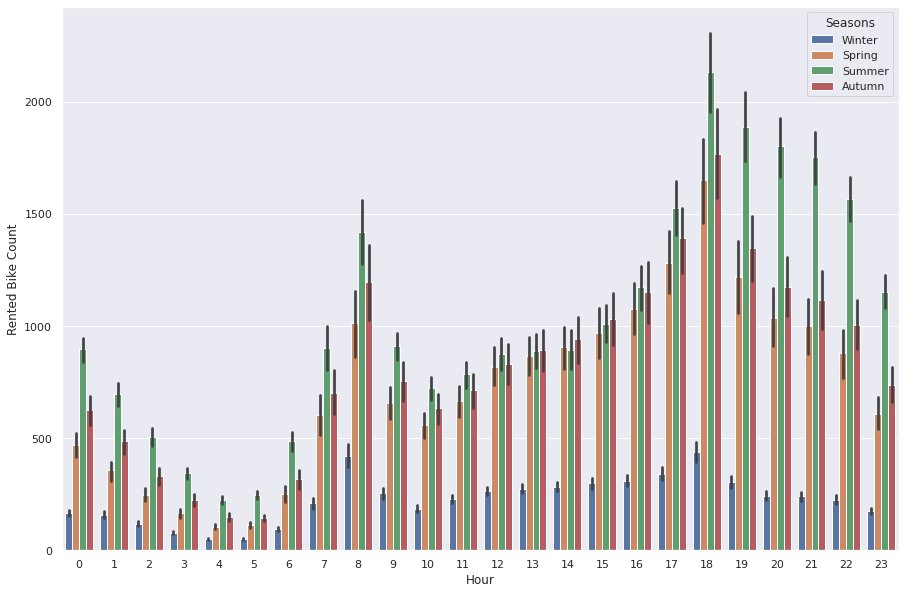

In [ ]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df_viz, x='Hour', y='Rented Bike Count', hue='Seasons')
plt.show()

The plot above represents another visualization of what was said earlier about the relationship between the target and the seasons/hours of the day.

Now, let's check the mean and the maximum of rented bikes depending on whether the day is a holiday or not.

In [ ]:
df_viz.loc[df_viz['Holiday'] == 'Holiday']['Rented Bike Count'].mean(), df_viz.loc[df_viz['Holiday'] == 'No Holiday']['Rented Bike Count'].mean()

(499.75694444444446, 715.2280259365995)

In [ ]:
df_viz.loc[df_viz['Holiday'] == 'Holiday']['Rented Bike Count'].max(), df_viz.loc[df_viz['Holiday'] == 'No Holiday']['Rented Bike Count'].max()

(2400, 3556)

Interpretation of these results: We would tend to think that people use mostly bikes during their holidays, but it is not the case. They are using bikes mostly on days that are not a holiday (to go to work or to go for a bike ride after work).

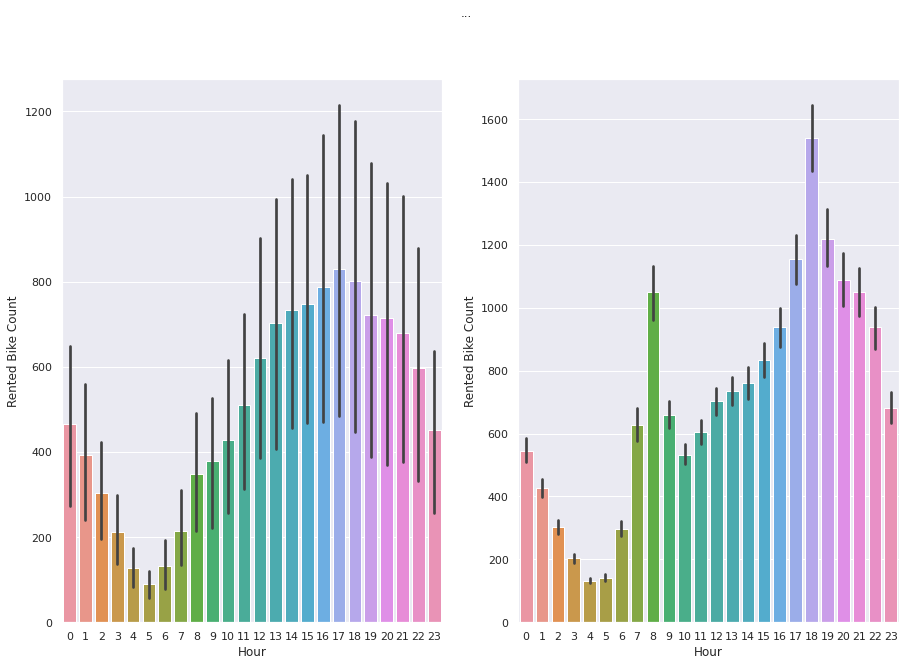

In [ ]:
df_viz_holiday = df_viz.loc[df_viz['Holiday'] == 'Holiday']
df_viz_no_holiday = df_viz.loc[df_viz['Holiday'] == 'No Holiday']

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('...')
sns.barplot(x=df_viz_holiday['Hour'], y=df_viz_holiday['Rented Bike Count'], data=df_viz_holiday, ax=ax[0])
sns.barplot(x=df_viz_no_holiday['Hour'], y=df_viz_no_holiday['Rented Bike Count'], data=df_viz_no_holiday, ax=ax[1])
plt.show()

Although, we can see that the rent of bikes during holidays increased from 5:00 AM to 5:00 PM and then decreased. There is just one pic at 5:00 PM compared to when a normal day of work where we can see two pics representing home/work commuting hours.

#### Weather

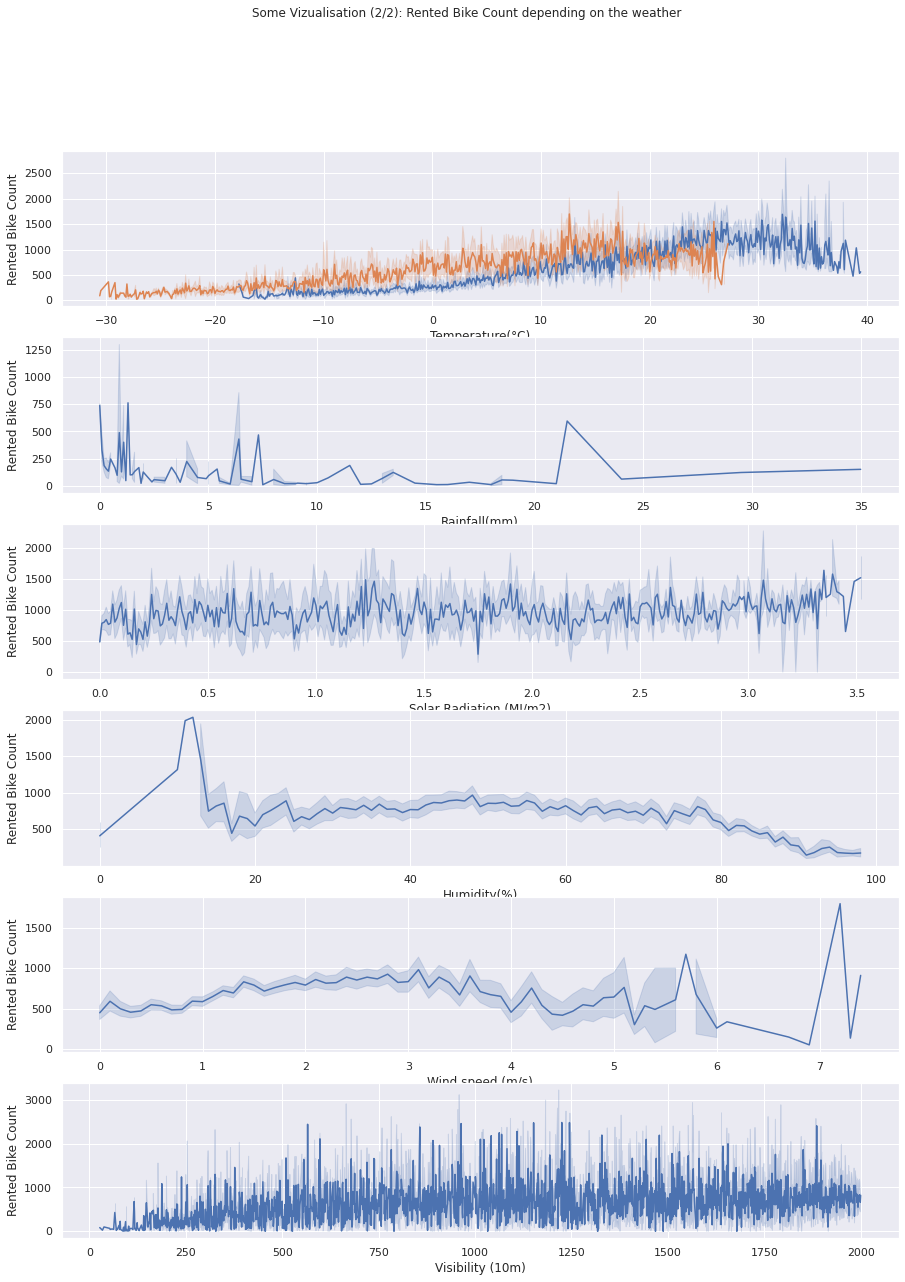

In [ ]:
fig, ax = plt.subplots(6, 1, figsize=(15, 20))
fig.suptitle('Some Vizualisation (2/2): Rented Bike Count depending on the weather')

sns.lineplot(x=df_viz['Temperature(°C)'], y=df_viz['Rented Bike Count'], data=df_viz, ax=ax[0])
sns.lineplot(x=df_viz['Rainfall(mm)'], y=df_viz['Rented Bike Count'], data=df_viz, ax=ax[1])
sns.lineplot(x=df_viz['Solar Radiation (MJ/m2)'], y=df_viz['Rented Bike Count'], data=df_viz, ax=ax[2])
sns.lineplot(x=df_viz['Humidity(%)'], y=df_viz['Rented Bike Count'], data=df_viz, ax=ax[3])
sns.lineplot(x=df_viz['Wind speed (m/s)'], y=df_viz['Rented Bike Count'], data=df_viz, ax=ax[4])
sns.lineplot(x=df_viz['Visibility (10m)'], y=df_viz['Rented Bike Count'], data=df_viz, ax=ax[5])

plt.show()

Plot 1: This plot shows the evolution of the target depending on the temperature. We can see that Korean people rent more bikes when the temperature is around the ambient temperature (25°C). During the Winter season, the weather is more likely to be dry and very cold (between -10 and -20°C). At those temperatures, there is less rent. So more the temperature is pleasant more the number of rented bikes increases.

Plot 2: This plot shows the evolution of the target depending on the rainfall. We do not see a pattern showing that Korean people use more bikes when it is not a rainy day.

Plot 3: This plot shows the evolution of the target depending on solar radiation. We can see lightly that the more the solar radiation increases more the rent of bikes tends to increase. But it is not obvious in this plot.

Plot 4: This plot shows the evolution of the target depending on the humidity. We can see that Korean people are more likely to rent bikes when the humidity is less.

Plot 5: This plot shows the evolution of the target depending on the wind speed. We do not see a pattern showing that Korean people use more bikes when it is not a windy day. The feature varies widely and we can not say if people rent more bikes when this kind of event happens is naturally difficult to predict accurately.

Plot 6: This plot shows the evolution of the target depending on the visibility. As the solar radiation feature, we can see lightly that the more the visibility increases more the rent of bikes tends to increase. But it is not obvious in this plot.

### Bivariate Analysis

Let's take a look to multiple pairwise bivariate distributions in this dataset.

<Figure size 720x480 with 0 Axes>

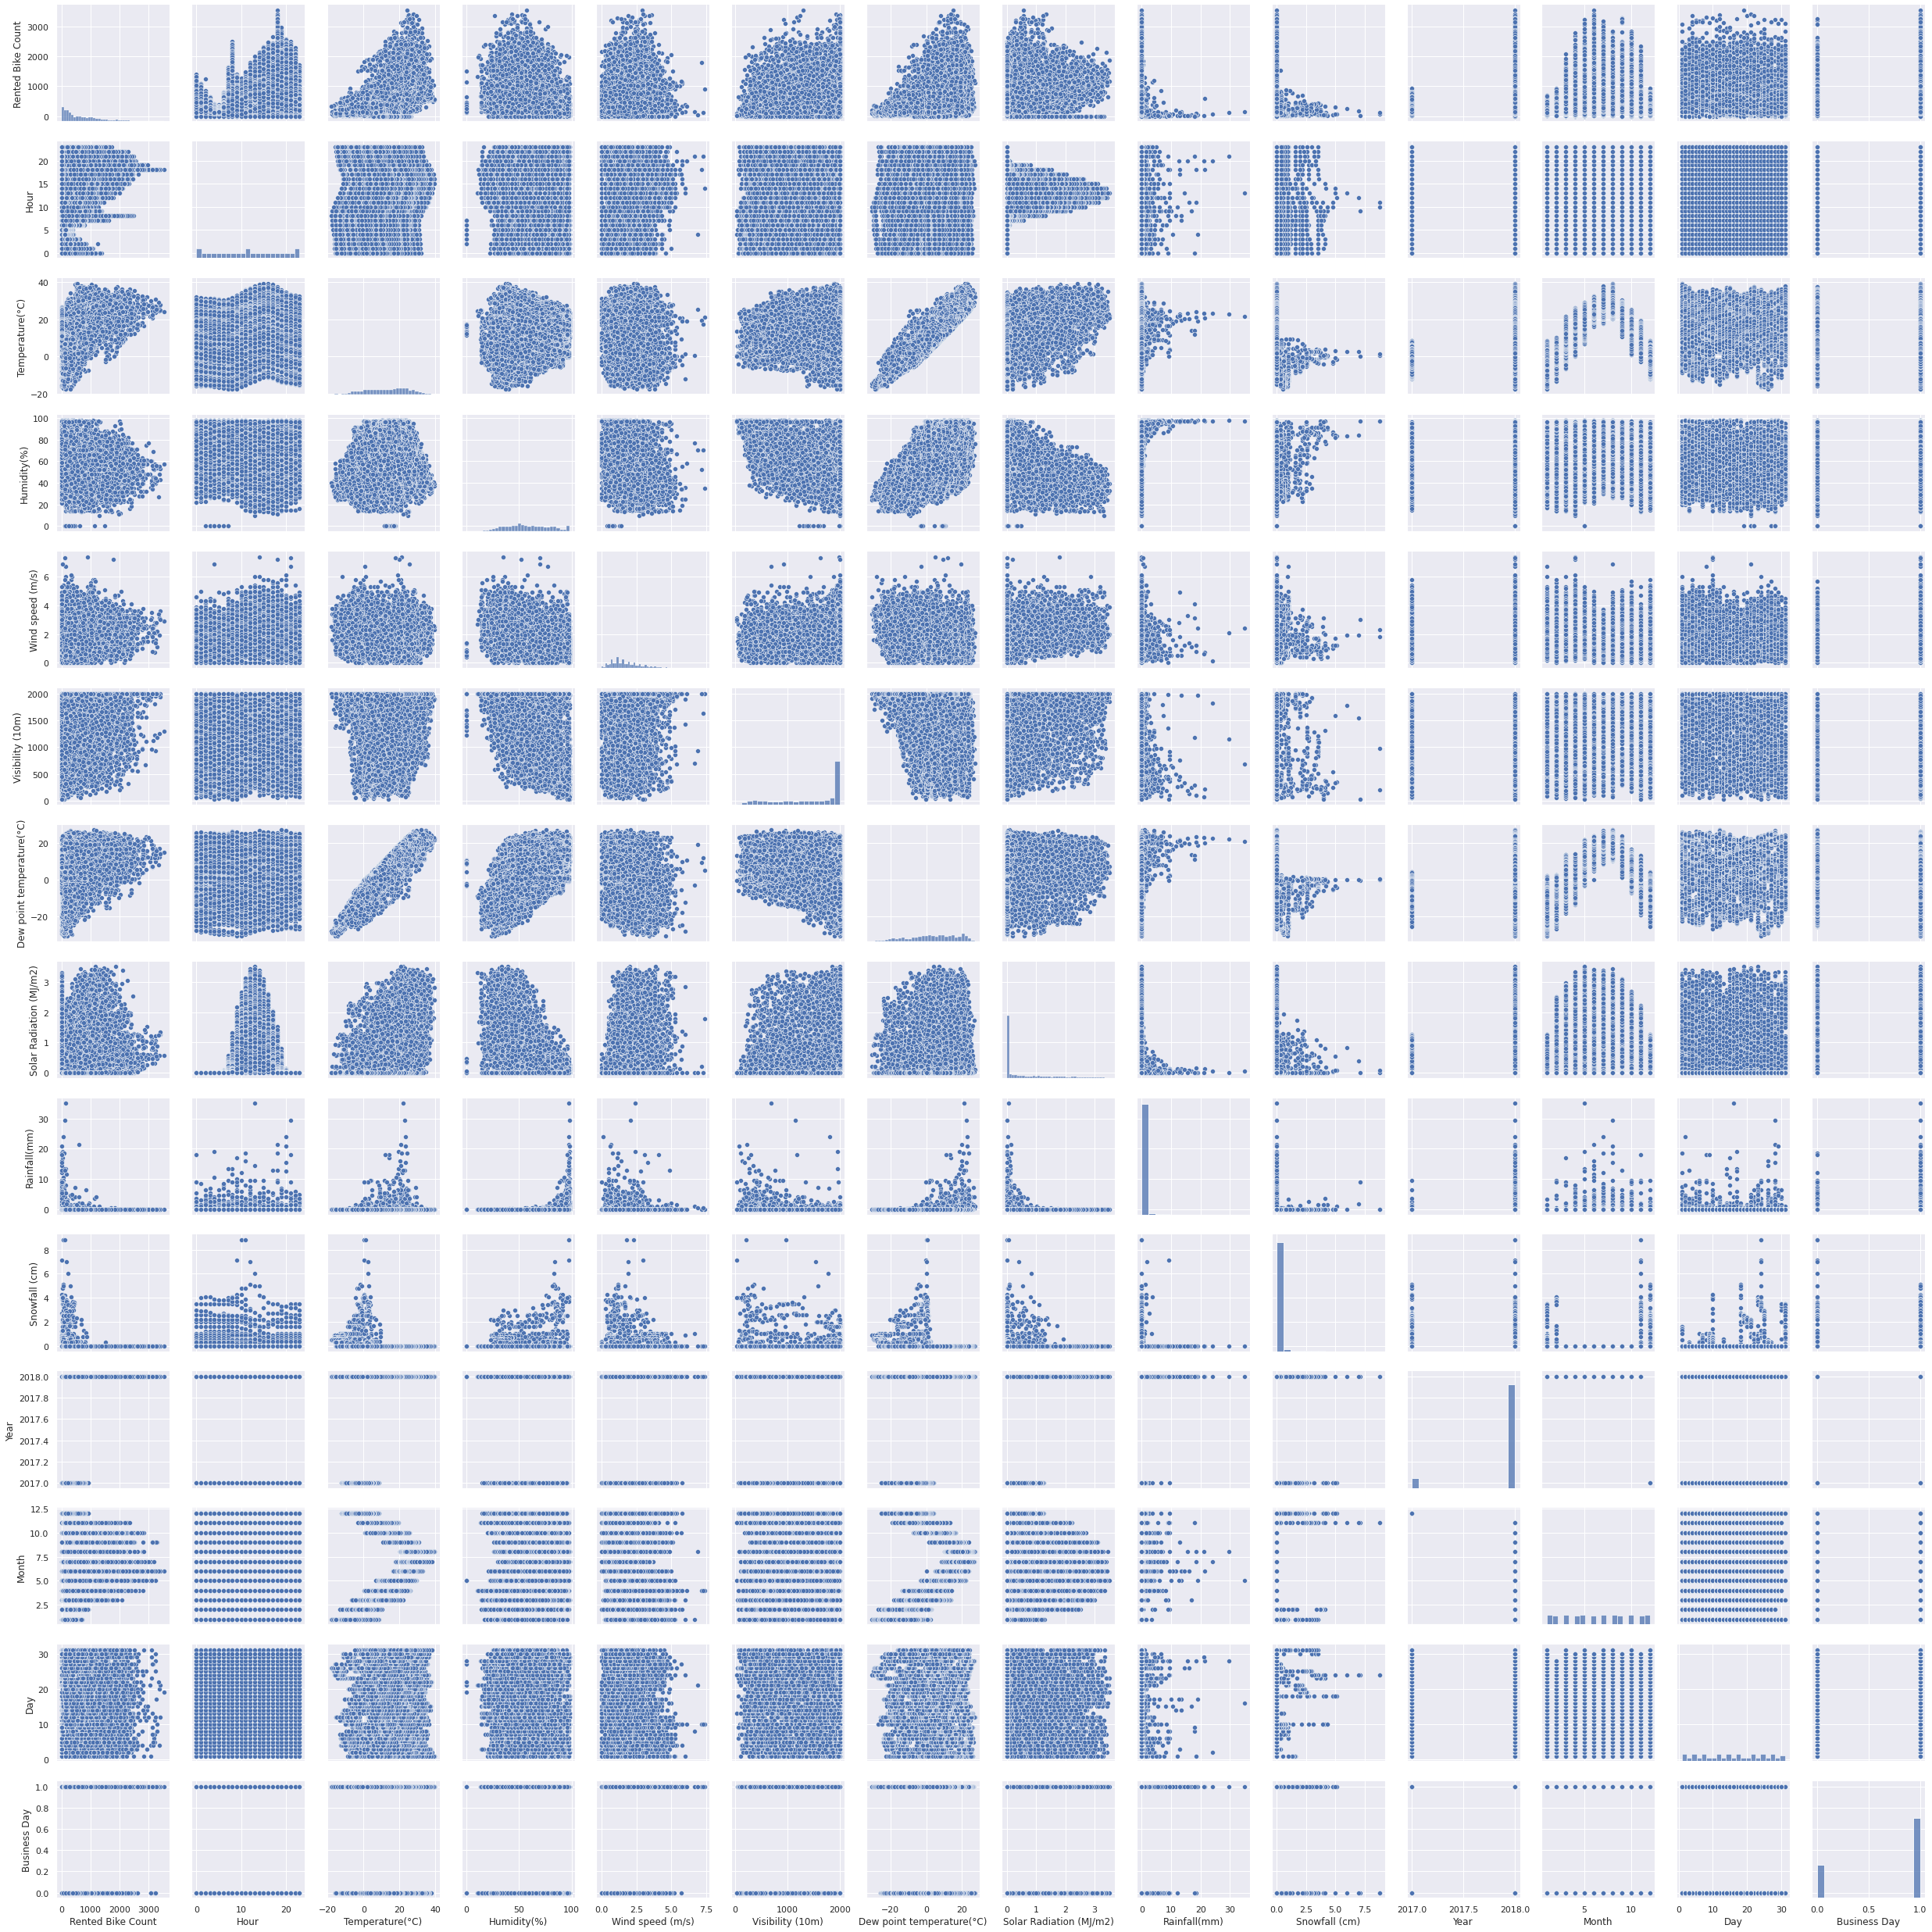

In [ ]:
plt.figure(dpi=120)
sns.pairplot(df_viz)
plt.show()

Here, we have the relationship for feature combinations as a matrix of plots. The diagonal plots are the univariate ones.

### Correlation

To visualize the correlation between each feature, we have to convert categorical features to numeric ones. The function below will do this job.

In [ ]:
def replace_categorical_values(df: pd.DataFrame, l: list):
    for col in l:
        l_categorical_to_replace = df[col].unique().tolist()
        for i, e in enumerate(l_categorical_to_replace):
            df = df.mask(df == e, i)
        df[col] = df[col].astype(int)
    return df

In [ ]:
df_prep = df_viz.copy()
l_cols = ['Seasons', 'Holiday', 'Functioning Day', 'Time of the day']

df_prep = replace_categorical_values(df_prep, l_cols)
df_prep

Date  Rented Bike Count  Hour  ...  Day  Business Day  Time of the day
0     01/12/2017                254     0  ...    1             1                0
1     01/12/2017                204     1  ...    1             1                1
2     01/12/2017                173     2  ...    1             1                1
3     01/12/2017                107     3  ...    1             1                1
4     01/12/2017                 78     4  ...    1             1                1
...          ...                ...   ...  ...  ...           ...              ...
8755  30/11/2018               1003    19  ...   30             1                0
8756  30/11/2018                764    20  ...   30             1                0
8757  30/11/2018                694    21  ...   30             1                0
8758  30/11/2018                712    22  ...   30             1                0
8759  30/11/2018                584    23  ...   30             1                0

[8760 rows x 19 columns]

In [ ]:
corr_mat = df_prep.corr()
corr_mat

Rented Bike Count  ...  Time of the day
Rented Bike Count                   1.000000  ...     1.153503e-01
Hour                                0.410257  ...     0.000000e+00
Temperature(°C)                     0.538558  ...     1.269705e-01
Humidity(%)                        -0.199780  ...    -2.965986e-01
Wind speed (m/s)                    0.121108  ...     2.608159e-01
Visibility (10m)                    0.199280  ...     2.998343e-02
Dew point temperature(°C)           0.379788  ...    -3.028247e-02
Solar Radiation (MJ/m2)             0.261837  ...     6.087409e-01
Rainfall(mm)                       -0.123074  ...     3.380437e-03
Snowfall (cm)                      -0.141804  ...     5.213645e-03
Seasons                             0.359687  ...     3.580752e-18
Holiday                            -0.072338  ...     0.000000e+00
Functioning Day                    -0.203943  ...    -2.547024e-03
Year                                0.215162  ...     0.000000e+00
Month                               0.133514  ...     1.215163e-17
Day                                 0.022291  ...    -2.061929e-18
Business Day                        0.032259  ...    -2.229937e-17
Time of the day                     0.115350  ...     1.000000e+00

[18 rows x 18 columns]

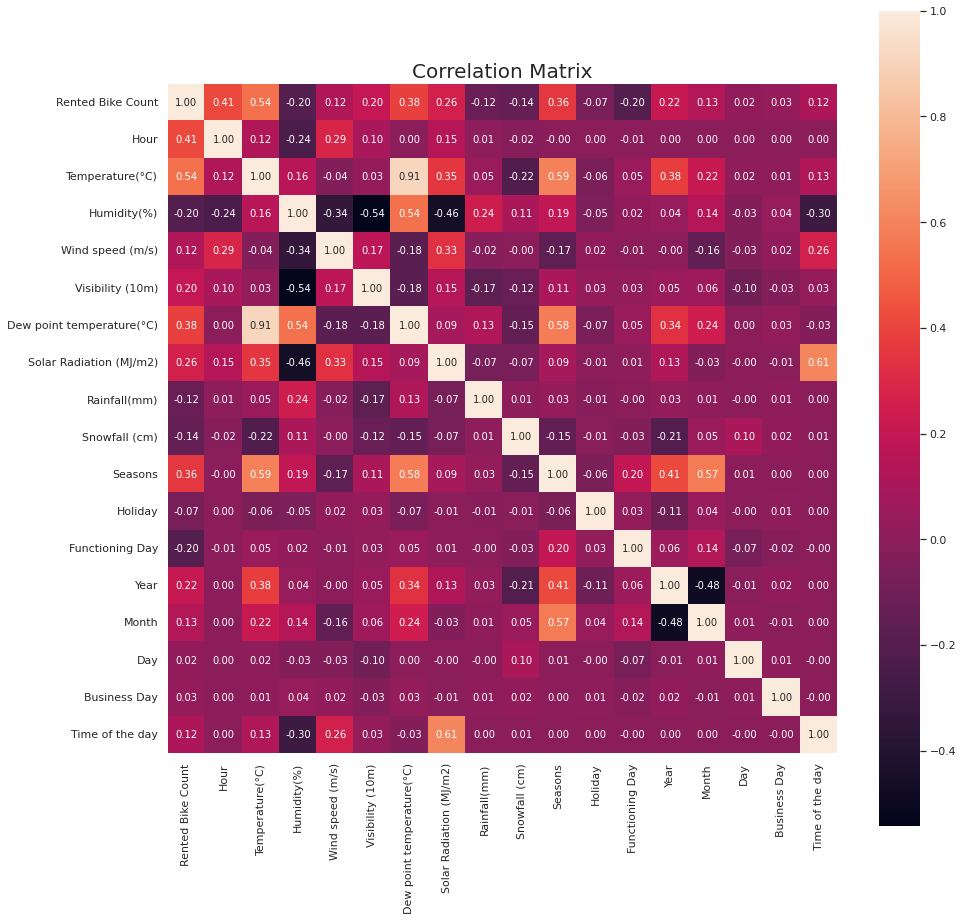

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f')
plt.title('Correlation Matrix', fontsize=20)
plt.show()

Here, we can see the correlation between each feature. Let's take a look at the correlation between them and the target.

In [ ]:
corr_mat[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False)

Rented Bike Count
Rented Bike Count                   1.000000
Temperature(°C)                     0.538558
Hour                                0.410257
Dew point temperature(°C)           0.379788
Seasons                             0.359687
Solar Radiation (MJ/m2)             0.261837
Year                                0.215162
Visibility (10m)                    0.199280
Month                               0.133514
Wind speed (m/s)                    0.121108
Time of the day                     0.115350
Business Day                        0.032259
Day                                 0.022291
Holiday                            -0.072338
Rainfall(mm)                       -0.123074
Snowfall (cm)                      -0.141804
Humidity(%)                        -0.199780
Functioning Day                    -0.203943

We can see here that the feature with the highest correlation with the target is the temperature. Then we find the hour, the dew point temperature, the seasons, the solar radiation, the year, the visibility, the month, the wind speed, the time of the day and, the type of day (business day or weekend). The others have poor correlation or negative ones.
For the ones stated above, I will drop the dew point temperature, the month, the year, and the time of the day features. Indeed, for the first one which is the dew point temperature, this one is highly correlated with the temperature and the humidity. Or we have seen that the temperature feature is highly correlated to the target compared to the humidity one. So, to avoid biasing any model, I will not use it. The year one is not representative because it is composed of only two values (mainly composed of one year, 2018) as we have seen before. And for the last one, we have already the hour of the day.

In [ ]:
l_significant_features = [
    'Temperature(°C)',
    'Hour',
    'Seasons',
    'Solar Radiation (MJ/m2)',
    'Visibility (10m)',
    'Month',
    'Wind speed (m/s)',
    'Business Day'
]

## Data Processing & Feature Engineering

### Normalization/Standardization

In [ ]:
# Creating a dataframe without the target
df_prep_w_target = df_prep[l_significant_features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_prep_w_target, df_prep['Rented Bike Count'], test_size=0.30)
X_train

Temperature(°C)  Hour  Seasons  ...  Month  Wind speed (m/s)  Business Day
7730              9.2     2        3  ...     10               1.5             1
5180             27.1    20        2  ...      7               2.9             0
7622             18.9    14        3  ...     10               2.6             0
8621              2.1     5        3  ...     11               0.4             0
1892             -2.1    20        0  ...      2               2.0             0
...               ...   ...      ...  ...    ...               ...           ...
5571             26.1     3        2  ...      7               0.1             0
3235              9.5    19        1  ...      4               2.3             0
3891             15.2     3        1  ...      5               0.5             1
7635             11.3     3        3  ...     10               0.0             1
1018            -13.0    10        0  ...      1               2.2             0

[6132 rows x 8 columns]

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=df_prep_w_target.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=df_prep_w_target.columns)

## Models Fitting

In [64]:
models = {
    'Linear Regression': LinearRegression(),
    'Least Absolute Selection Shrinkage Operator (LASSO)': Lasso(),
    'SVM - Regressor': SVR(),
    'Decision Trees': DecisionTreeRegressor(),
    'Bagging': BaggingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [65]:
df_result = pd.DataFrame(index=list(models.keys()))

### Model Selection: Training and Cross Validation

In [72]:
for f in tqdm(range(5, 16)):
    l_scores = []
    l_rmse = []
    for k, v in models.items():
        kfolds = KFold(n_splits=f)
        cross_validation = cross_val_score(v, X_train, y_train, cv=kfolds)
        cross_validation_rmse = cross_val_score(v, X_train, y_train, cv=kfolds, scoring='neg_mean_squared_error')
        l_scores.append(cross_validation.mean())
        l_rmse.append(np.sqrt(abs(cross_validation_rmse.mean())))
    df_result.loc[:, f'accuracy_kfold_{f}'] = l_scores
    df_result.loc[:, f'rmse_kfold_{f}'] = l_rmse

df_result

100%|██████████| 11/11 [16:50<00:00, 91.84s/it] 


accuracy_kfold_5  ...  rmse_kfold_15
Linear Regression                                           0.441634  ...     481.058806
Least Absolute Selection Shrinkage Operator (LA...          0.441617  ...     481.066134
SVM - Regressor                                             0.247107  ...     547.159490
Decision Trees                                              0.541281  ...     430.120109
Bagging                                                     0.731956  ...     329.249829
AdaBoost                                                    0.536752  ...     445.151234
Random Forest                                               0.758745  ...     312.517075

[7 rows x 22 columns]

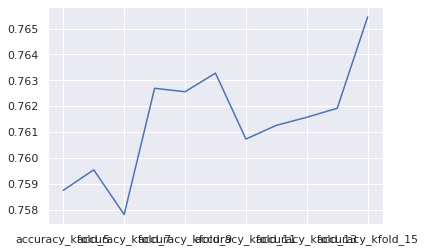

In [116]:
l_cols = [col for col in df_result.columns.tolist() if 'accuracy' in col]
df_result.loc['Random Forest', l_cols].plot()
plt.show()

In [75]:
n = len(X_train)
p = len(X_train.columns.tolist())
l_adj_r2 = []
for k, v in models.items():
    kfolds = KFold(n_splits=10)
    cross_validation = cross_val_score(v, X_train, y_train, cv=kfolds)
    l_adj_r2.append(1 - ((1-cross_validation.mean()) * (n-1)/(n-p-1)))
df_result.loc[:, f'adj_r2_kfold_10'] = l_adj_r2

df_result

accuracy_kfold_5  ...  adj_r2_kfold_10
Linear Regression                                           0.441634  ...         0.439446
Least Absolute Selection Shrinkage Operator (LA...          0.441617  ...         0.439441
SVM - Regressor                                             0.247107  ...         0.269639
Decision Trees                                              0.541281  ...         0.548449
Bagging                                                     0.731956  ...         0.737933
AdaBoost                                                    0.536752  ...         0.526746
Random Forest                                               0.758745  ...         0.762049

[7 rows x 23 columns]

In [76]:
df_result['accuracy_kfold_10'].sort_values(ascending=False)

Random Forest                                          0.763276
Bagging                                                0.738083
Decision Trees                                         0.536864
AdaBoost                                               0.525045
Linear Regression                                      0.440177
Least Absolute Selection Shrinkage Operator (LASSO)    0.440172
SVM - Regressor                                        0.270592
Name: accuracy_kfold_10, dtype: float64

### Hyperparameters for the selected models

In [93]:
def grid_search_models(model_fitted, params, kfolds):
    grid_search_model = GridSearchCV(model_fitted, param_grid=params, cv=kfolds, n_jobs=-1)
    grid_search_model.fit(X_train, y_train)
    return grid_search_model.best_params_

def random_search_models(model_fitted, params, kfolds):
    random_search_model = GridSearchCV(model_fitted, param_grid=params, cv=kfolds, n_jobs=-1)
    random_search_model.fit(X_train, y_train)
    return random_search_model.best_params_

#### Random Forest

In [79]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
pred_model_rf = model_rf.predict(X_test)
model_rf.score(X_test, y_test)

0.7853605339625851

In [91]:
params_rf = {
    'criterion': ('squared_error', 'absolute_error'),
    'max_depth': [60, 80, 100],
    'n_estimators': [200, 400, 600, 1000]
}

d_best_params_rf = grid_search_models(RandomForestRegressor(), params_rf, 5)
d_best_params_rf

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

In [77]:
model_rf = RandomForestRegressor(**d_best_params_rf)
model_rf.fit(X_train, y_train)
pred_model_rf = model_rf.predict(X_test)
model_rf.score(X_test, y_test)

ValueError: ignored

#### AdaBoost

In [108]:
model_ab = AdaBoostRegressor()
model_ab.fit(X_train, y_train)
pred_model_ab = model_ab.predict(X_test)
model_ab.score(X_train, y_train), model_ab.score(X_test, y_test)

(0.5407401829292152, 0.5245230657158811)

In [109]:
params_ab = {
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]
}

d_best_params_ab = grid_search_models(AdaBoostRegressor(), params_ab, 10)
d_best_params_ab

{'learning_rate': 0.1, 'n_estimators': 100}

In [100]:
d_best_params_ab_bis = random_search_models(AdaBoostRegressor(), params_ab, 10)
d_best_params_ab_bis

{'learning_rate': 0.1, 'n_estimators': 100}

In [98]:
model_ab = AdaBoostRegressor(**d_best_params_ab)
model_ab.fit(X_train, y_train)
pred_model_ab = model_ab.predict(X_test)
model_ab.score(X_test, y_test), model_ab.score(X_test, y_test)

0.5862084601510227

### LASSO

In [82]:
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
pred_model_lasso = model_lasso.predict(X_test)
model_lasso.score(X_test, y_test)

0.42532226904790105

In [85]:
params_lasso = {
    'alpha': [5, 4, 3, 2, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0]
}

d_best_params_lasso = grid_search_models(model_lasso, params_lasso, 10)
d_best_params_lasso

{'alpha': 0.05}

In [94]:
d_best_params_lasso_bis = random_search_models(model_lasso, params_lasso, 10)
d_best_params_lasso_bis

{'alpha': 0.5}

In [110]:
model_lasso = Lasso(**d_best_params_lasso)
model_lasso.fit(X_train, y_train)
pred_model_lasso = model_lasso.predict(X_test)
model_lasso.score(X_test, y_test)

0.42533833159909074

## Conclusion

...